In [110]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
!pip install sqlalchemy
from flask import jsonify

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import and_,func


In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model

# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)


In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
session.query(Measurement.station,Measurement.prcp).all()

[('USC00519397', 0.08),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', None),
 ('USC00519397', 0.06),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.01),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.01),
 ('USC00519397', 0.0),
 ('USC00519397', 0.04),
 ('USC00519397', 0.12),
 ('USC00519397', 0.0),
 ('USC00519397', None),
 ('USC00519397', 0.03),
 ('USC00519397', 0.01),
 ('USC00519397', None),
 ('USC00519397', 0.01),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.02),
 ('USC00519397', 0.01),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0

In [12]:
# Find the most recent date in the data set.
session.query(Measurement, func.max(Measurement.date)).limit(1).all()

[(<sqlalchemy.ext.automap.measurement at 0x21a0acac580>, '2017-08-23')]

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database: 2017-08-23

# Calculate the date one year from the last date in data set: 2016-08-23


# Perform a query to retrieve the data and precipitation scores

session.query(Measurement.date, Measurement.prcp).filter(and_(func.date(Measurement.date) >= dt.date(2016, 8, 23),\
                                  func.date(Measurement.date) <= dt.date(2017, 8, 23))).all()


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data




# Save the query results as a Pandas DataFrame and set the index to the date column
month12prcp = session.query(Measurement.date, Measurement.prcp).filter(and_(func.date(Measurement.date) >= dt.date(2016, 8, 23),\
                                  func.date(Measurement.date) <= dt.date(2017, 8, 23))).all()

month12df = pd.DataFrame(month12prcp, columns=['Date','Precipitation'])

month12ddf = month12df.set_index('Date')

#print(month12ddf)

# Sort the dataframe by date
month12ddf.sort_values(by='Date')



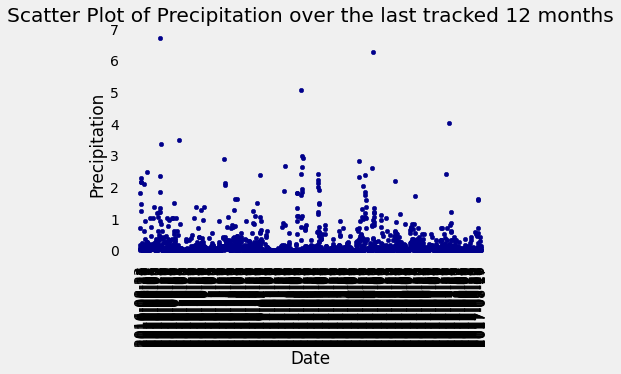

In [115]:
# Use Pandas Plotting with Matplotlib to plot the data()
prcpplot = month12df.plot.scatter(x='Date', y='Precipitation', c='DarkBlue', title="Scatter Plot of Precipitation over the last tracked 12 months")
plt.xticks(rotation = 90)
plt.grid()
plt.show()


# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number stations in the dataset


session.query(Station.station).count()

9

In [47]:
join_query = session.query(Measurement)\
                    .join(Station, Station.station == Measurement.station)


# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

from sqlalchemy import func, desc

session.query(Measurement.station,
        func.count(Measurement.station).label('qty')
        ).group_by(Measurement.station
        ).order_by(desc('qty'))

In [51]:
from sqlalchemy import func, desc

session.query(Measurement.station, func.count(Measurement.station).label('qty') ).group_by(Measurement.station ).order_by(desc('qty')).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [77]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = session.query(Measurement.station, Measurement.tobs).filter_by(station = 'USC00519281').all()

active_stationdf = pd.DataFrame(active_station, columns=['Station','Temperature'])
active_stationddf = (active_stationdf.set_index("Station")
                                    .select_dtypes(np.number)
                                    .stack()
                                    .groupby(level=0)
                                    .agg(['min','max','mean']))

active_stationddf


,min,max,mean
Station,,,
USC00519281,54.0,85.0,71.663781


In [95]:
# Using the most active station id

active_stationdates = session.query(Measurement.station, Measurement.tobs, Measurement.date).filter_by(station = 'USC00519281').all()

active_stationdatesdf = pd.DataFrame(active_stationdates, columns=['Station','Temperature', 'Date'])

active_stationdateddf = active_stationdatesdf.set_index('Date')

#active_stationdatesdf.sort_values(by="Date", ascending = False)
active_stationdateddf.loc['2016-08-18':'2017-08-18']

,Station,Temperature
Date,,
2016-08-18,USC00519281,80.0
2016-08-19,USC00519281,79.0
2016-08-20,USC00519281,81.0
2016-08-21,USC00519281,79.0
2016-08-22,USC00519281,78.0
...,...,...
2017-08-14,USC00519281,77.0
2017-08-15,USC00519281,77.0
2017-08-16,USC00519281,76.0


<AxesSubplot:ylabel='Frequency'>

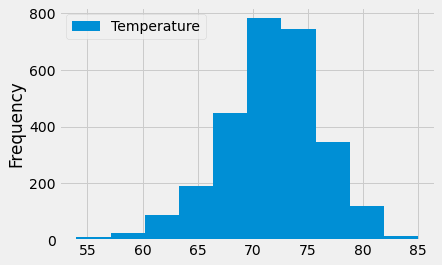

In [109]:

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


active_stationdateddf.plot.hist()

# Close session

In [ ]:
# Close Session
session.close()